In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style(theme='chesterish')
c1 = '#ff1732'
c2 = '#ffa929'
c3 = '#3bffe2'
morado = '#dc2eff'
verde = '#20eb1c'

In [2]:
#Valores en la frontera:
a = 1.0 #frontera izquierda
b = 3.0 #frontera derecha
α = 17.0   #y(a) = α
β = 43/3   #y(b) = β

M = 100 #número máximo de iteraciones
tolerancia = 0.0001
N = 1000 #número de subintervalos
h = (b-a)/N
tk = (β-α)/(b-a) #aproximación inicial de la pendiente a variar

In [3]:
def nonlinshoot(f, fy, fy1, sol=0, a=0.01, α=0.0, b=1.0, β=1.0, max_iter=100, N=1000, title='', solution='', compare=False, xlabel='x', ylabel='y', error=False):

    tolerancia = 1/N
    h = (b-a)/N
    tk = (β-α)/(b-a)

    if compare == True:
        sol_analiticax = [a]
        sol_analiticay = [α]
        sol_numericax = [a]
        sol_numericay = [α]
        errorx = [a]
        errory = [0]

        y = sol

        k = 1

        while k <= M:
            w1 = [α]
            w2 = [tk]
            u1 = 0.0
            u2 = 1.0
            for i in range(1, N+1):
                x = a + (i-1)*h
        # Definición de términos de Runge-Kutta
                k11 = h*w2[i-1]
                k12 = h*f(x, w1[i-1], w2[i-1])
                k21 = h*(w2[i-1]+(0.5)*k12)
                k22 = h*f(x+(0.5)*h, w1[i-1]+(0.5)*k11, w2[i-1]+(0.5)*k12)
                k31 = h*(w2[i-1]+(0.5)*k22)
                k32 = h*f(x+(0.5)*h, w1[i-1]+(0.5)*k21, w2[i-1]+(0.5)*k22)
                k41 = h*(w2[i-1]+(0.5)*k32)
                k42 = h*f(x+h, w1[i-1]+(0.5)*k31, w2[i-1]+(0.5)*k32)
        ############################
                w1y = w1[i-1] + (k11 + 2*k21 + 2*k31 + k41)*(1/6)
                w2y = w2[i-1] + (k12 + 2*k22 + 2*k32 + k42)*(1/6)
                w1.append(w1y)
                w2.append(w2y)
                c11 = h*u2
                c12 = h*(fy(x, w1[i-1], w2[i-1])*u1 +
                         fy1(x, w1[i-1], w2[i-1])*u2)
                c21 = h*(u2+(0.5)*c12)
                c22 = h*(fy(x+(0.5)*h, w1[i-1], w2[i-1])*(u1+(0.5)*c11) +
                         fy1(x+(0.5)*h, w1[i-1], w2[i-1])*(u2+(0.5)*c21))
                c31 = h*(u2+(0.5)*c22)
                c32 = h*(fy(x+(0.5)*h, w1[i-1], w2[i-1])*(u1+(0.5)*c21) +
                         fy1(x+(0.5)*h, w1[i-1], w2[i-1])*(u2+(0.5)*c22))
                c41 = h*(u2+c32)
                c42 = h*(fy(x+(0.5)*h, w1[i-1], w2[i-1])*(u1+c31) +
                         fy1(x+(0.5)*h, w1[i-1], w2[i-1])*(u2+c32))
                u1 = u1 + (1/6)*(c11+2*c21+2*c31+c41)
                u2 = u2 + (1/6)*(c12+2*c22+2*c32+c42)

            if abs(w1[-1]-β) <= tolerancia:
                for i in range(1, N+1):
                    x = a + i*h
                    sol_analiticax.append(x)
                    sol_analiticay.append(y(x))
                    sol_numericax.append(x)
                    sol_numericay.append(w1[i])
                    errorx.append(x)
                    errory.append((abs(y(x) - w1[i])/w1[i])*100)
                break
            else:
                tk = tk - (w1[N]-β)/u1
                k = k + 1

        if error == True:
            fig, axs = plt.subplots(2, 1)
            axs[0].plot(sol_numericax, sol_numericay,
                        color=c1, label='Solución Numérica')
            axs[0].plot(sol_analiticax, sol_analiticay, color=c2,
                        label='Solución Analítica'+'\n'+solution, dashes=[4, 2])
            axs[0].set_xlabel(xlabel)
            axs[0].set_ylabel(ylabel)
            axs[0].legend()
            axs[0].set_title(title)

            axs[1].plot(errorx, errory, color=c1)
            axs[1].set_xlabel(xlabel)
            axs[1].set_ylabel('Error Porcentual')
            fig.tight_layout()

        else:
            fig, axs = plt.subplots()
            axs.plot(sol_numericax, sol_numericay,
                     color=c1, label='Solución Numérica')
            axs.plot(sol_analiticax, sol_analiticay, color=c2,
                     label='Solución Analítica'+'\n'+solution, dashes=[4, 2])
            axs.set_xlabel(xlabel)
            axs.set_ylabel(ylabel)
            axs.legend()
            axs.set_title(title)

        return sol_numericax, sol_numericay, h, fig

    elif compare == False:
        sol_numericax = [a]
        sol_numericay = [α]

        k = 1
        while k <= M:
            w1 = [α]
            w2 = [tk]
            u1 = 0.0
            u2 = 1.0
            for i in range(1, N+1):
                x = a + (i-1)*h
        # Definición de términos de Runge-Kutta
                k11 = h*w2[i-1]
                k12 = h*f(x, w1[i-1], w2[i-1])
                k21 = h*(w2[i-1]+(0.5)*k12)
                k22 = h*f(x+(0.5)*h, w1[i-1]+(0.5)*k11, w2[i-1]+(0.5)*k12)
                k31 = h*(w2[i-1]+(0.5)*k22)
                k32 = h*f(x+(0.5)*h, w1[i-1]+(0.5)*k21, w2[i-1]+(0.5)*k22)
                k41 = h*(w2[i-1]+(0.5)*k32)
                k42 = h*f(x+h, w1[i-1]+(0.5)*k31, w2[i-1]+(0.5)*k32)
        ############################
                w1y = w1[i-1] + (k11 + 2*k21 + 2*k31 + k41)*(1/6)
                w2y = w2[i-1] + (k12 + 2*k22 + 2*k32 + k42)*(1/6)
                w1.append(w1y)
                w2.append(w2y)
                c11 = h*u2
                c12 = h*(fy(x, w1[i-1], w2[i-1])*u1 +
                         fy1(x, w1[i-1], w2[i-1])*u2)
                c21 = h*(u2+(0.5)*c12)
                c22 = h*(fy(x+(0.5)*h, w1[i-1], w2[i-1])*(u1+(0.5)*c11) +
                         fy1(x+(0.5)*h, w1[i-1], w2[i-1])*(u2+(0.5)*c21))
                c31 = h*(u2+(0.5)*c22)
                c32 = h*(fy(x+(0.5)*h, w1[i-1], w2[i-1])*(u1+(0.5)*c21) +
                         fy1(x+(0.5)*h, w1[i-1], w2[i-1])*(u2+(0.5)*c22))
                c41 = h*(u2+c32)
                c42 = h*(fy(x+(0.5)*h, w1[i-1], w2[i-1])*(u1+c31) +
                         fy1(x+(0.5)*h, w1[i-1], w2[i-1])*(u2+c32))
                u1 = u1 + (1/6)*(c11+2*c21+2*c31+c41)
                u2 = u2 + (1/6)*(c12+2*c22+2*c32+c42)

            if abs(w1[-1]-β) <= tolerancia:
                for i in range(1, N):
                    x = a + i*h
                    sol_numericax.append(x)
                    sol_numericay.append(w1[i])
                return sol_numericax, sol_numericay, h
                break
            else:
                tk = tk - (w1[N]-β)/u1
                k = k + 1

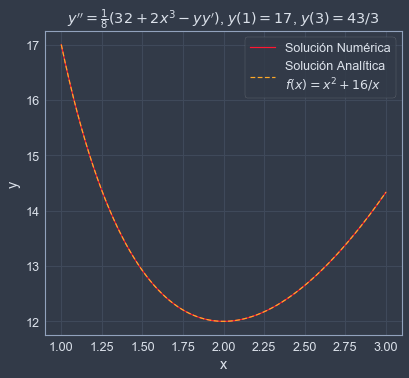

In [4]:
def f(x,y,y1):
    return (1/8)*(32 + 2*x**3 - y*y1)

def fy(x,y,y1):
    return (1/8)*(-y1)

def fy1(x,y,y1):
    return (1/8)*(-y); #Derivada de f respecto a y'

def y(x):
    return x**2 + 16/x #solución analítica para comparar con la numérica

ecuation = r'$y^{\prime\prime} = \frac{1}{8}(32 + 2x^3 - yy^\prime)$, $y(1) = 17$, $y(3) = 43/3$' 
solution = r'$f(x) = x^2 + 16/x$'
solx, soly, h, fig = nonlinshoot(f, fy, fy1, sol=y, a=1, α = 17, b = 3, β= 43/3, N = 10000, compare = True ,title = ecuation, solution = solution)

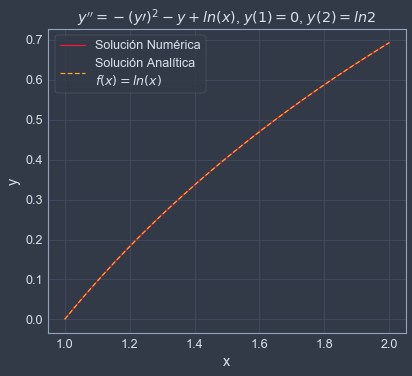

In [5]:
ecuation = r'$y^{\prime\prime} = -(y\prime)^2 -y + ln(x)$, $y(1) = 0$, $y(2) = ln2$' 
solution = r'$f(x) = ln(x)$'
def f(x,y,y1):
    return -y1**2 -y + np.log(x)

def fy(x,y,y1):
    return -y

def fy1(x,y,y1):
    return -2*y1

def y(x):
    return np.log(x)

solx, soly, h, fig = nonlinshoot(f, fy, fy1, sol=y, a=1, α = 0.0, b = 2, β= np.log(2), N = 10000, compare = True ,title = ecuation, solution = solution)

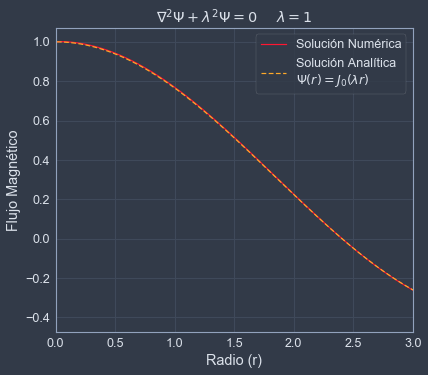

In [6]:
from scipy import special as sp
λ = 1


def f(x, y, y1):
    return -(1/x)*y1 - (λ**2)*y


def fy(x, y, y1):
    return -λ


def fy1(x, y, y1):
    return -(1/x)


def y(x):
    return sp.j0(λ*x)


ecuation = r'$\nabla^2\Psi + \lambda^2\Psi = 0$     $\lambda = 1$'
solution = r'$\Psi(r) = J_0(\lambda r)$'
xlabel = 'Radio (r)'
ylabel = 'Flujo Magnético'
a = 0.01
b = sp.jn_zeros(0, 3)[1]
N = 1000
fluxx, fluxy, h, fig = nonlinshoot(f, fy, fy1, a=a, α=1, b=b, β=y(
    b), compare=True, error=False, sol=y, N=N, title=ecuation, solution=solution, xlabel=xlabel, ylabel=ylabel)
plt.xlim(0, 3)
# plt.ylim(-1,1)
plt.show()

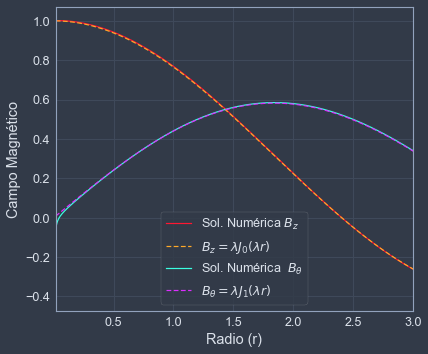

In [7]:
Bθ = []
Bz = []
for i in range(1,len(fluxy)-1):
    bθ = -(fluxy[i+1]-fluxy[i-1])/(2*h)
    Bθ.append(bθ)
    bz = λ*fluxy[i]
    Bz.append(bz)
    
r = fluxx[1:-1]
plt.plot(r, Bz, label = 'Sol. Numérica $B_z$', color = c1)
plt.plot(r, λ*sp.j0(λ*np.array(r)), label = r'$B_z = \lambda J_0(\lambda r)$', dashes=[4, 2], color = c2)

plt.plot(r, Bθ, label = r'Sol. Numérica  $B_\theta$', color = c3)
plt.plot(r, λ*sp.j1(λ*np.array(r)), label = r'$B_θ = \lambda J_1(\lambda r)$', dashes=[4, 2], color = morado);
plt.xlabel('Radio (r)')
plt.ylabel('Campo Magnético')
plt.legend()
plt.xlim(r[0],3)
plt.show()

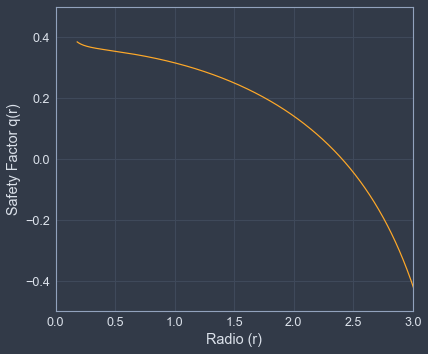

In [8]:
start = 30
Bt = np.array(Bz[start:])
Bp = np.array(Bθ[start:])
R = b
r = np.array(fluxx[start+1:-1])

q = (r/R)*(Bt/Bp)

plt.plot(r,q, color = c2)
plt.xlim(0.0,3)
plt.ylim(-0.5,0.5)
plt.xlabel('Radio (r)')
plt.ylabel('Safety Factor q(r)')
plt.show()

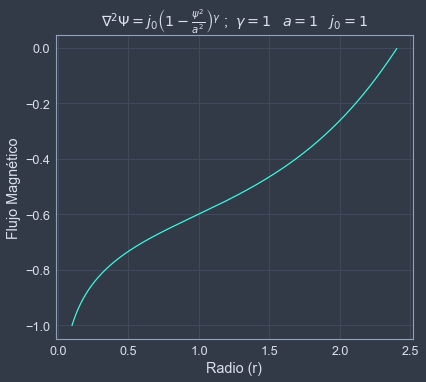

In [9]:
j0 = 1.0
c = 1.0
γ = 3.0


def f(r, ψ, ψ1):
    return -(1/r)*ψ1 + j0*(1 - ((ψ**2)/(c**2)))**γ


def fy(r, ψ, ψ1):
    return -j0*γ*(2*ψ/(c**2))*(1 - (ψ**2/c**2))**(γ-1)


def fy1(r, ψ, ψ1):
    return -(1/r)


ecuation = r'$\nabla^2\Psi + \lambda^2\Psi = 0$     $\lambda = 1$'
solution = r'$\Psi(r) = J_0(\lambda r)$'
a = 0.1
b = sp.jn_zeros(0, 3)[0]
N = 1000
fluxx, fluxy, h = nonlinshoot(f, fy, fy1, a=a, α=-1, b=b, β=sp.j0(b),
                              N=N, title=ecuation, solution=solution, xlabel=xlabel, ylabel=ylabel)

plt.plot(fluxx, fluxy, color=c3)
plt.title(
    r'$\nabla^2\Psi = j_0\left(1 - \frac{\psi^2}{a^2}\right)^\gamma$ ;  $\gamma = 1 \;\;\; a = 1 \;\;\; j_0 = 1$')
solution = r'$\Psi(r) = J_0(\lambda r)$'
plt.xlabel('Radio (r)')
plt.ylabel('Flujo Magnético')
plt.show()

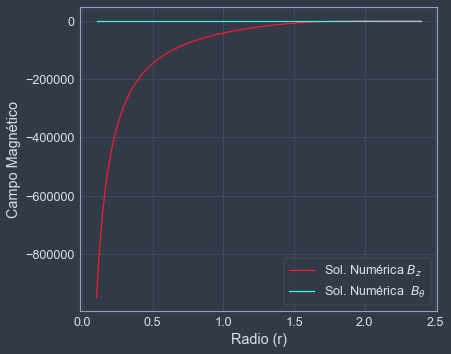

In [10]:
Bθ = []
Bz = []
for i in range(1,len(fluxy)-1):
    bθ = -(fluxy[i+1]-fluxy[i-1])/(2*h)
    Bθ.append(bθ)
    bz = j0*( 1 - ((fluxy[i]**2)/(a**2)) )**γ
    Bz.append(bz)
    

c3 = '#3bffe2'
c4 = '#851ee6'
r = fluxx[1:-1]
plt.plot(r, Bz, label = 'Sol. Numérica $B_z$', color = c1)

plt.plot(r, Bθ, label = r'Sol. Numérica  $B_\theta$', color = c3)
plt.xlabel('Radio (r)')
plt.ylabel('Campo Magnético')
plt.legend()
#plt.xlim(r[0],3)
plt.show()

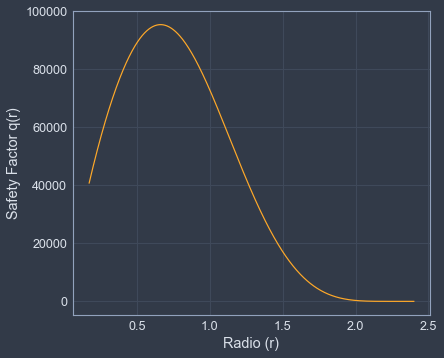

In [11]:
start = 30
Bt = np.array(Bz[start:])
Bp = np.array(Bθ[start:])
R = b
r = np.array(fluxx[start+1:-1])

q = (r/R)*(Bt/Bp)

plt.plot(r,q, color = c2)
# plt.xlim(0.0,3)
# plt.ylim(-0.5,0.5)
plt.xlabel('Radio (r)')
plt.ylabel('Safety Factor q(r)')
plt.show()

In [12]:
import math as mt


def campos(start = 0):
    Bθ = []
    Bz = []
    for i in range(1, len(fluxy)-1):
        bθ = -(fluxy[i+1]-fluxy[i-1])/(2*h)
        Bθ.append(bθ)
        bz = mt.sqrt(-2*((β1/2)*fluxy[i]**2 + β2*fluxy[i] + β3))
        Bz.append(bz)


    r = fluxx[1:-1]

    
    fig, axs = plt.subplots(2, 1, sharex = True)
    axs[0].plot(r, Bz, label=r'Sol. Numérica $B_z$', color=c1)
    axs[0].plot(r, Bθ, label=r'Sol. Numérica  $B_{\theta}$', color=c3)
    axs[0].legend()
    #axs[0].set_xlabel(r'Radio r')
    axs[0].set_ylabel('Campo Magnético')

    Bt = np.array(Bz[start:])
    Bp = np.array(Bθ[start:])
    R = b
    r = np.array(fluxx[start+1:-1])

    q = (r/R)*(Bt/Bp)

    axs[1].plot(r,q, color = c2)
    axs[1].set_xlabel('Radio (r)')
    axs[1].set_ylabel('Safety Factor q(r)')

$\nabla^2\psi = -\mu_0 P' - bb'$

$- \mu_0 P =  \alpha_1\psi^2 + \alpha_2\psi + \alpha_3 \;\;\;  \rightarrow \;\;\; -\mu_0 P' = \alpha_1\psi + \alpha_2$

$ -\frac{1}{2}b^2 = \frac{\beta_1}{2}\psi^2 + \beta_2\psi + \beta_3 \;\;\; \rightarrow \;\;\; -bb' = \beta_1\psi + \beta_2$

$\implies \nabla^2\psi = (\alpha_1 + \beta_1) \psi + (\alpha_2 + \beta_2) $

$b(\psi) = \sqrt{-2\left(\frac{\beta_1}{2}\psi^2 + \beta_2\psi + \beta_3  \right)}$

$\mu_0P(\psi) = -(\alpha_1\psi^2 + \alpha_2\psi + \alpha_3)$

$B_z(\psi) = b(\psi)$

$B_{\theta} = -\frac{\partial\psi}{\partial r}$



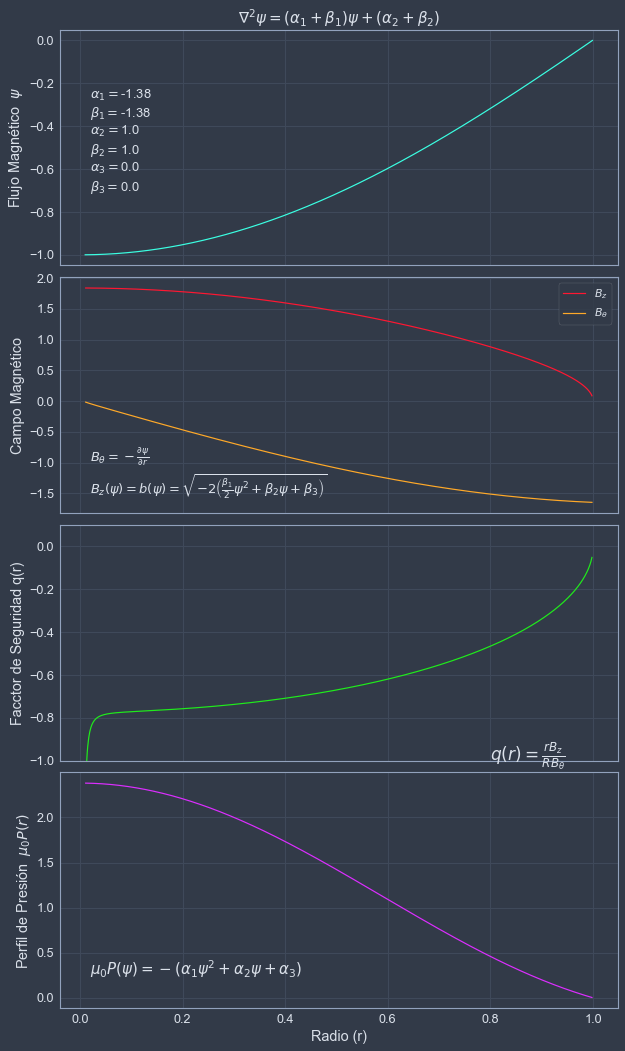

In [13]:
α1 = -1.38
β1 = -1.38
α2 = 1.0
β2 = 1.0
α3 = 0.0
β3 = 0.0


def f(r, ψ, ψ1):
    return -(1/r)*ψ1 + (α1 + β1)*ψ + (α2 + β2)


def fy(r, ψ, ψ1):
    return (α1 + β1)


def fy1(r, ψ, ψ1):
    return -(1/r)


ecuation = r'$\nabla^2\Psi + \lambda^2\Psi = 0$     $\lambda = 1$'
solution = r'$\Psi(r) = J_0(\lambda r)$'
xlabel = 'Radio (r)'
ylabel = 'Flujo Magnético'
a = 0.01
b = 1  # sp.jn_zeros(0, 3)[0]
β = 0  # sp.j0(b)
N = 1000
fluxx, fluxy, h = nonlinshoot(f, fy, fy1, a=a, α=-1, b=b, β=β, N=N,
                              title=ecuation, solution=solution, xlabel=xlabel, ylabel=ylabel)

r = np.array(fluxx)
ψ = np.array(fluxy)

fig, axs = plt.subplots(4, 1, figsize=(10, 18), sharex=True)

fig.subplots_adjust(hspace=0.05)

fontsize = 15

axs[0].plot(r, ψ, color=c3)
axs[0].set_title(
    r'$\nabla^2\psi = (\alpha_1 + \beta_1) \psi + (\alpha_2 + \beta_2)$', fontsize=fontsize)
axs[0].text(0.02, -0.7, r'$\alpha_1 = $' + str(α1) + '\n' + r'$\beta_1 = $' + str(β1) +
            '\n' + r'$\alpha_2 = $' + str(α2) + '\n' + r'$\beta_2 = $' + str(β2) + '\n' + r'$\alpha_3 = $' + str(α3) + '\n' + r'$\beta_3 = $' + str(β3), fontsize=fontsize-2)
axs[0].set_ylabel('Flujo Magnético  $\psi$')

Bθ = []
Bz = []
for i in range(1, len(ψ)-1):
    bθ = -(ψ[i+1]-ψ[i-1])/(2*h)
    Bθ.append(bθ)
    bz = mt.sqrt(-2*((β1/2)*ψ[i]**2 + β2*ψ[i] + β3))
    Bz.append(bz)


r = r[1:-1]

axs[1].plot(r, Bz, label=r'$B_z$', color=c1)
axs[1].plot(r, Bθ, label=r'$B_{\theta}$', color=c2)
axs[1].legend(fontsize=fontsize - 4)
axs[1].set_ylabel('Campo Magnético')
axs[1].text(0.02, -1.5, r'$B_{\theta} = -\frac{\partial\psi}{\partial r}$' + '\n' +
            r'$B_z(\psi) = b(\psi) = \sqrt{-2\left(\frac{\beta_1}{2}\psi^2 + \beta_2\psi + \beta_3  \right)}$', fontsize=fontsize-2)


Bt = np.array(Bz)
Bp = np.array(Bθ)
R = b
q = (r/R)*(Bt/Bp)
axs[2].plot(r, q, color=verde)
axs[2].set_ylabel('Facctor de Seguridad q(r)')
axs[2].text(
    0.8, -1.0, r'$q(r) = \frac{r B_z}{R B_{\theta}}$', fontsize=fontsize + 2)
axs[2].set_ylim(-1,0.1)


muP = -(α1*ψ**2 + α2*ψ + α3)
muP = muP[1:-1]
axs[3].plot(r, muP, color=morado)
axs[3].set_xlabel(r'Radio (r)')
axs[3].set_ylabel(r'Perfil de Presión  $\mu_0 P(r)$')
axs[3].text(
    0.02, 0.25, r'$\mu_0 P(\psi) = -(\alpha_1\psi^2 + \alpha_2\psi + \alpha_3)$', fontsize=fontsize)

plt.show()
#plt.savefig('perfil2.png')